In [57]:
test_hyperparameters = True

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
property_df = pd.read_parquet("../../data/raw/property_details_w_distances.parquet")

In [60]:
columns_to_drop = ['title', 'description', 'street_address', 'suburb', 
                    'structured_features', 'video_count', 'floor_plans_count',
                   'date_listed', 'virtual_tour', 'latitude', 'longitude', 'primary_property_type']

In [61]:
target = np.array(property_df['price']) # target variable
features = np.array(property_df.drop(columns=columns_to_drop+['price']))
feature_list = list(property_df.drop(columns=columns_to_drop+['price']).columns)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Split the data (70% train, 30% test)
data_train, data_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=30034)

# Function to evaluate a model
def evaluate_model(model, data_train, target_train, data_test, target_test):
    model.fit(data_train, target_train)
    predictions = model.predict(data_test)
    errors = abs(predictions - target_test)
    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

# RandomForestRegressor
print("RandomForestRegressor:")
rf = RandomForestRegressor(n_estimators=400, random_state=30034, max_features='sqrt', max_depth=None)
evaluate_model(rf, data_train, target_train, data_test, target_test)

# GradientBoostingRegressor
print("\nGradientBoostingRegressor:")
gb = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, random_state=30034)
evaluate_model(gb, data_train, target_train, data_test, target_test)

# Lasso
print("\nLasso:")
lasso = Lasso(alpha=0.01, random_state=30034)
evaluate_model(lasso, data_train, target_train, data_test, target_test)

# Ridge
print("\nRidge:")
ridge = Ridge(alpha=1.0, random_state=30034)
evaluate_model(ridge, data_train, target_train, data_test, target_test)

# XGBoost
print("\nXGBoost:")
xgb = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=30034)
evaluate_model(xgb, data_train, target_train, data_test, target_test)

# Support Vector Regressor
print("\nSupport Vector Regressor:")
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
evaluate_model(svr, data_train, target_train, data_test, target_test)

# K-Nearest Neighbors Regressor
print("\nK-Nearest Neighbors Regressor:")
knn = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn, data_train, target_train, data_test, target_test)

# Decision Tree Regressor
print("\nDecision Tree Regressor:")
tree = DecisionTreeRegressor(random_state=30034, max_depth=None)
evaluate_model(tree, data_train, target_train, data_test, target_test)

# ElasticNet
print("\nElasticNet:")
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=30034)
evaluate_model(elasticnet, data_train, target_train, data_test, target_test)

# AdaBoost
print("\nAdaBoost:")
adaboost = AdaBoostRegressor(n_estimators=400, learning_rate=0.1, random_state=30034)
evaluate_model(adaboost, data_train, target_train, data_test, target_test)


RandomForestRegressor:
Mean Absolute Error: 99.84
Accuracy: 85.34 %.

GradientBoostingRegressor:
Mean Absolute Error: 103.86
Accuracy: 84.71 %.

Lasso:
Mean Absolute Error: 159.51
Accuracy: 75.67 %.

Ridge:
Mean Absolute Error: 159.51
Accuracy: 75.67 %.

XGBoost:


/home/tumbles/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.269e+08, tolerance: 6.249e+04
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error: 104.14
Accuracy: 84.54 %.

Support Vector Regressor:
Mean Absolute Error: 175.88
Accuracy: 74.93 %.

K-Nearest Neighbors Regressor:
Mean Absolute Error: 168.73
Accuracy: 74.64 %.

Decision Tree Regressor:
Mean Absolute Error: 141.22
Accuracy: 79.06 %.

ElasticNet:
Mean Absolute Error: 159.35
Accuracy: 75.69 %.

AdaBoost:


/home/tumbles/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.273e+08, tolerance: 6.249e+04
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error: 356.15
Accuracy: 33.71 %.


In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

if test_hyperparameters:
    # Define the hyperparameter grid for Random Forest
    rf_param_grid = {
        'n_estimators': [100, 200, 400, 600],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
    }

    # Instantiate the RandomForestRegressor
    rf = RandomForestRegressor(random_state=30034)

    # Set up RandomizedSearchCV
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid,
                                n_iter=50, cv=5, verbose=2, random_state=30034, n_jobs=-1)

    # Perform the search
    rf_random.fit(data_train, target_train)

    # Get the best parameters
    print("Best parameters for RandomForestRegressor:", rf_random.best_params_)

    # Evaluate on the test data
    best_rf = rf_random.best_estimator_
    rf_predictions = best_rf.predict(data_test)
    rf_mae = np.mean(abs(rf_predictions - target_test))
    print(f"RandomForestRegressor MAE: {rf_mae}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimator

/home/tumbles/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
115 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tumbles/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tumbles/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/tumbles/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/tumbles

Best parameters for RandomForestRegressor: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
RandomForestRegressor MAE: 99.08335509512703


In [64]:
# Best parameters for RandomForestRegressor: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
# RandomForestRegressor
print("RandomForestRegressor:")
rf = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=20, bootstrap=False)
evaluate_model(rf, data_train, target_train, data_test, target_test)

RandomForestRegressor:
Mean Absolute Error: 98.31
Accuracy: 85.78 %.


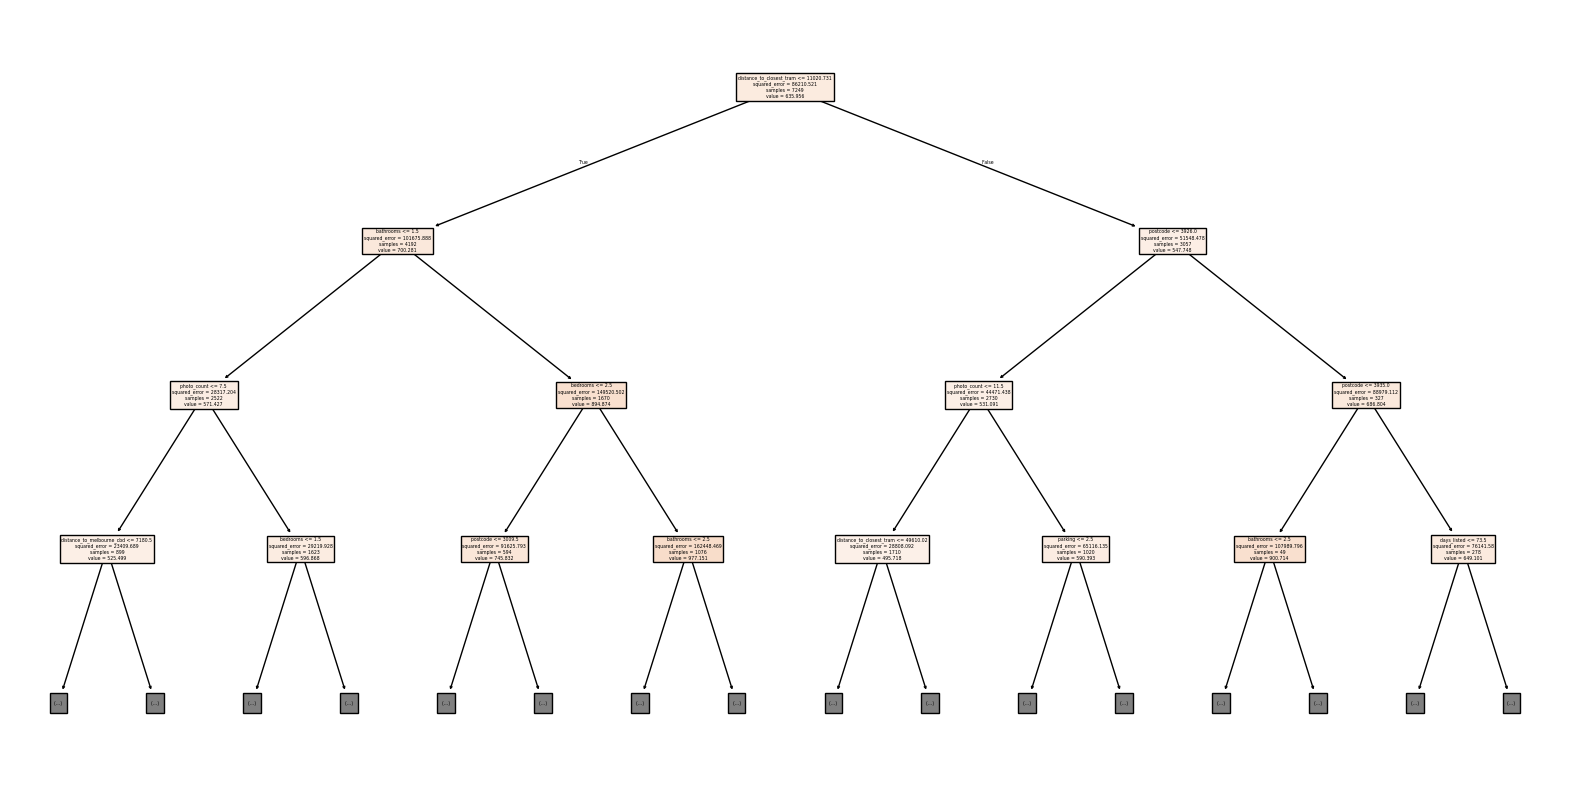

In [65]:
from sklearn.tree import plot_tree

# Plot the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=feature_list, filled=True, max_depth=3)
plt.savefig('../../plots/decision_tree.png')
plt.show()

In [66]:
y = rf.feature_importances_
list_y = [a for a in y if a > 0.005]
print(list_y)

list_of_index = []
for i in list_y:
    a = np.where(y==i)
    list_of_index.append(a)
print(list_of_index)
list_of_index = [0,1,2,3,4,5,6,7,8,9,10,11]

[np.float64(0.09418336985686794), np.float64(0.12455262279890848), np.float64(0.16992525799970642), np.float64(0.06548809217227022), np.float64(0.05254297506744142), np.float64(0.057752046938099565), np.float64(0.038545614169586), np.float64(0.05867949502317083), np.float64(0.034767528560718804), np.float64(0.12972692327948948), np.float64(0.12028050386505135), np.float64(0.053555570268689616)]
[(array([0]),), (array([1]),), (array([2]),), (array([3]),), (array([4]),), (array([5]),), (array([6]),), (array([7]),), (array([8]),), (array([9]),), (array([10]),), (array([11]),)]


In [67]:
col = []
for i in feature_list:
    col.append(i)
labels = []
for i in list_of_index:
    b = col[i]
    labels.append(b)

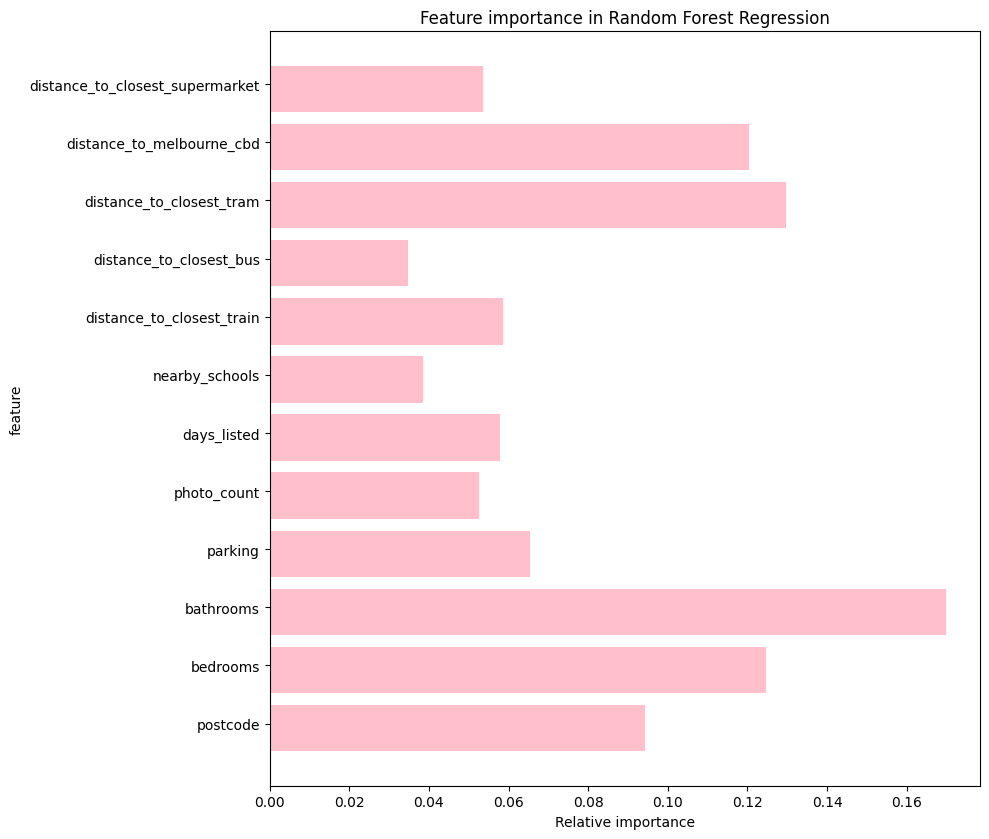

In [68]:
y = list_y
fig, ax = plt.subplots() 
width = 0.8
ind = np.arange(len(y)) 
ax.barh(ind, y,width, color="pink")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(labels, minor=False)
plt.title('Feature importance in Random Forest Regression')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
fig.set_size_inches(10, 8.5, forward=True)
plt.tight_layout()
plt.savefig('../../plots/feature_importance.png')
plt.show()


In [76]:
from sklearn.model_selection import cross_val_predict

# Assuming rf is your RandomForestRegressor model and X is the features DataFrame (without the target column)
# Also assuming 'price' is the target column

# Step 1: Perform cross-validation prediction on the entire dataset
y_pred = cross_val_predict(rf, features, y=property_df['price'], cv=5)

# Step 2: Calculate the absolute errors
errors = ((y_pred - property_df['price'])/y_pred) *100

# Step 3: Add the prediction and error to the DataFrame
property_df['predicted_price'] = y_pred
property_df['error'] = errors

# Step 4: Sort by the largest error to find the most mispriced properties
most_mispriced = property_df.sort_values(by='error', ascending=False)

# Step 5: Lookup the street address of the most mispriced properties using the original index
most_mispriced = most_mispriced[['title', 'street_address', 'price', 'bedrooms', 'distance_to_melbourne_cbd', 'predicted_price', 'error']]

In [81]:
most_mispriced[(most_mispriced['error'] < 63.7286) & (most_mispriced['distance_to_melbourne_cbd'] < 25000)].head(20)

,title,street_address,price,bedrooms,distance_to_melbourne_cbd,predicted_price,error
6210,"1/29 Barwon Avenue, Reservoir VIC 3073 - House...","29 Barwon Avenue, Reservoir VIC 3073",180.0,1.0,13855.762319,472.117582,61.873905
8486,"1/5 Browns Road, Clayton VIC 3168 - Apartment ...","5 Browns Road, Clayton VIC 3168",195.0,1.0,24342.006552,505.820833,61.448800
4818,"56 Burke Road, Malvern East VIC 3145 - House F...","56 Burke Road, Malvern East VIC 3145",230.0,1.0,12445.389586,564.180000,59.232869
6566,"34 Coventry Crescent, Mill Park VIC 3082 - Hou...","34 Coventry Crescent, Mill Park VIC 3082",210.0,1.0,22194.904908,493.545000,57.450688
8566,"1/60 The Avenue, Prahran VIC 3181 - Apartment ...","60 The Avenue, Prahran VIC 3181",170.0,1.0,7176.178124,396.686288,57.144977
2780,"701/21 Poplar Street, Box Hill VIC 3128 - Apar...","21 Poplar Street, Box Hill VIC 3128",700.0,3.0,17137.152705,1597.235000,56.174264
3319,"148 Station Street, Burwood VIC 3125 - House F...","148 Station Street, Burwood VIC 3125",220.0,1.0,18387.026134,487.928333,54.911411
964,"3.1/7 White Street, Oakleigh East VIC 3166 - T...","3.1/7 White Street, Oakleigh East VIC 3166",290.0,5.0,22578.802185,642.208895,54.843354
1758,"593 Elizabeth Street, Melbourne VIC 3000 - Apa...","593 Elizabeth Street, Melbourne VIC 3000",300.0,1.0,951.835571,626.779932,52.136311
9137,"9/19 Commercial Road, Footscray VIC 3011 - Apa...","19 Commercial Road, Footscray VIC 3011",190.0,1.0,8118.364627,393.507925,51.716347
